In [ ]:
!pip install datasets transformers evaluate shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
import pandas as pd
from datasets import load_dataset
from datasets import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/NLP

/content/drive/MyDrive/NLP


In [ ]:
data = pd.read_csv(r"AlexaCombinedReviews.csv",on_bad_lines='skip')

In [ ]:
data

verified_reviews  \
0                                         Love my Echo!   
1                                             Loved it!   
2     Sometimes while playing a game, you can answer...   
3     I have had a lot of fun with this thing. My 4 ...   
4                                                 Music   
...                                                 ...   
3145  Perfect for kids, adults and everyone in betwe...   
3146  Listening to music, searching locations, check...   
3147  I do love these things, i have them running my...   
3148  Only complaint I have is that the sound qualit...   
3149                                               Good   

                                    paraphrased_reviews  
0                           \n\nI'm so fond of my Echo!  
1                                      \n\nI adored it!  
2     \n\nSometimes when playing a game, I can answe...  
3     \n\nI've had a blast with this device. My four...  
4      is the food of the soul\n\nMusic nourishes th...  
...                                                 ...  
3145                            \n\nGreat for all ages!  
3146  \n\nThere are many more tasks that can be lear...  
3147  \n\nI'm really fond of these gadgets; they con...  
3148  \n\nMy only issue with the dot is the sound qu...  
3149                               luck\n\nBest of luck  

[3150 rows x 2 columns]

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(3149, 2)

In [ ]:
data['paraphrased_reviews'] = data['paraphrased_reviews'].apply(lambda x: x.replace("\n",""))

<ipython-input-9-e217575a8f53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['paraphrased_reviews'] = data['paraphrased_reviews'].apply(lambda x: x.replace("\n",""))


In [ ]:
data

verified_reviews  \
0                                         Love my Echo!   
1                                             Loved it!   
2     Sometimes while playing a game, you can answer...   
3     I have had a lot of fun with this thing. My 4 ...   
4                                                 Music   
...                                                 ...   
3145  Perfect for kids, adults and everyone in betwe...   
3146  Listening to music, searching locations, check...   
3147  I do love these things, i have them running my...   
3148  Only complaint I have is that the sound qualit...   
3149                                               Good   

                                    paraphrased_reviews  
0                               I'm so fond of my Echo!  
1                                          I adored it!  
2     Sometimes when playing a game, I can answer a ...  
3     I've had a blast with this device. My four yea...  
4      is the food of the soulMusic nourishes the sp...  
...                                                 ...  
3145                                Great for all ages!  
3146  There are many more tasks that can be learned,...  
3147  I'm really fond of these gadgets; they control...  
3148  My only issue with the dot is the sound qualit...  
3149                                   luckBest of luck  

[3149 rows x 2 columns]

In [ ]:
import re
# define a regular expression to match any newline character
newline_regex = re.compile(r'\r?\n')

# define a lambda function to remove any newline characters from a string
remove_newlines = lambda s: newline_regex.sub('', s)

# apply the lambda function to the 'paraphrased_reviews' column
data['paraphrased_reviews'] = data['paraphrased_reviews'].apply(remove_newlines)

<ipython-input-11-9d449da60241>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['paraphrased_reviews'] = data['paraphrased_reviews'].apply(remove_newlines)


In [ ]:
data = data[~(data['verified_reviews'].str.len() == 1)]

In [ ]:
data = data[~(data['verified_reviews'].str.split(" ").str.len() == 1)]

In [ ]:
emoticons = re.compile('[:;=]-?[)(DP]')

data['verified_reviews'] = data['verified_reviews'].replace(emoticons, '')

# print(data["verified_reviews"][19])

In [ ]:
data.describe()

verified_reviews  paraphrased_reviews
count              2997                 2997
unique             2256                 2859
top            Love it!  I'm really into it!
freq                 22                   22

In [ ]:
word_count = 0
word_count_list = []
# Loop through each term in data
for text in data['verified_reviews'])):
  word_count_list.append(len(text.split(" ")))

SyntaxError: ignored

In [ ]:
plt.hist(word_count_list, bins=50)
plt.title('Number of words per sentence')
plt.xlabel('Sentence length in words')
plt.ylabel('Number of sentences')
plt.show()

In [ ]:
data_human = pd.DataFrame.from_dict({"verified_reviews":data['verified_reviews'],
                                    "label":1})

In [ ]:
data_human

verified_reviews  label
0                                         Love my Echo!      1
1                                             Loved it!      1
2     Sometimes while playing a game, you can answer...      1
3     I have had a lot of fun with this thing. My 4 ...      1
5     I received the echo as a gift. I needed anothe...      1
...                                                 ...    ...
3144                                            love it      1
3145  Perfect for kids, adults and everyone in betwe...      1
3146  Listening to music, searching locations, check...      1
3147  I do love these things, i have them running my...      1
3148  Only complaint I have is that the sound qualit...      1

[2997 rows x 2 columns]

In [ ]:
import re

In [ ]:
data_para = pd.DataFrame.from_dict({"verified_reviews":data['paraphrased_reviews'],
                                    "label":0})

In [ ]:
data_final = pd.concat([data_human,data_para])

In [ ]:
data_final = data_final.sample(frac = 1)

In [ ]:
data_final = data_final.reset_index()

In [ ]:
data_final = data_final.drop(columns = "index")

In [ ]:
data_final

verified_reviews  label
0     I purchased this so that my husband would have...      0
1     Still learning what it can do. Amazing. Simple...      1
2                  Good product I like it . Thank you !      1
3     Love it l. I plan on getting an echo for the k...      1
4     I'm so excited to have an Echo Show as my pers...      0
...                                                 ...    ...
5989                   I cant figure out how to use it.      1
5990               It's Alexa.... what else can you say      1
5991  It is as if we are having a conversation with ...      1
5992  Amazing product. Still learnimg all the things...      1
5993  This product performs as expected and even bet...      0

[5994 rows x 2 columns]

In [ ]:
dataset = Dataset.from_pandas(data_final)

In [ ]:
dataset = dataset.train_test_split(test_size=0.1)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['verified_reviews', 'label'],
        num_rows: 5394
    })
    test: Dataset({
        features: ['verified_reviews', 'label'],
        num_rows: 600
    })
})

In [ ]:
from transformers import AutoTokenizer

tokenizer_config = {
    'max_length': 128,
    'padding': 'max_length',
    'truncation': True,
    'return_tensors': 'pt'
}

tokenizer = AutoTokenizer.from_pretrained("roberta-base", **tokenizer_config)

In [ ]:
def preprocess_function(examples):
  #test_sentence, padding=True, truncation=True,max_length=50, add_special_tokens = True
    return tokenizer(examples["verified_reviews"], truncation=True)

In [ ]:
from datasets import Dataset

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate

accuracy = evaluate.load("f1")

In [ ]:
import numpy as np
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=2, id2label=id2label, label2id=label2id
).to("cuda")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
tokenized_imdb = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/5394 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_imdb['train'],
    eval_dataset=tokenized_imdb['test'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


trainer.train()


This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


TrainOutput(global_step=1690, training_loss=0.11204055385476738, metrics={'train_runtime': 660.5908, 'train_samples_per_second': 40.827, 'train_steps_per_second': 2.558, 'total_flos': 1791656787029040.0, 'train_loss': 0.11204055385476738, 'epoch': 5.0})

In [ ]:
results = trainer.evaluate(tokenized_imdb["test"])

In [ ]:
import transformers


In [ ]:
results

{'eval_loss': 0.17537826299667358,
 'eval_f1': 0.958813838550247,
 'eval_runtime': 4.1368,
 'eval_samples_per_second': 145.038,
 'eval_steps_per_second': 9.186,
 'epoch': 5.0}

In [ ]:
import shap


In [ ]:
explainer = shap.Explainer(model,tokenizer)

In [ ]:
test = data_final[data_final['label'] == 0]

In [ ]:
pred = transformers.pipeline("text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=True)

`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


In [ ]:
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)

In [ ]:
explainer = shap.Explainer(pred)

In [ ]:
shap_values = explainer(dataset['train']['verified_reviews'][:500])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   0%|          | 2/500 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   1%|          | 5/500 [00:19<14:48,  1.80s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:   1%|          | 6/500 [00:26<30:12,  3.67s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   1%|▏         | 7/500 [00:32<38:11,  4.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 9/500 [00:39<30:05,  3.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 10/500 [00:44<35:04,  4.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 11/500 [00:50<37:32,  4.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 12/500 [00:56<42:54,  5.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   3%|▎         | 13/500 [01:03<45:39,  5.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   3%|▎         | 14/500 [01:10<48:52,  6.03s/it]

  0%|          | 0/380 [00:00<?, ?it/s]

Partition explainer:   3%|▎         | 16/500 [01:17<37:47,  4.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|▎         | 18/500 [01:27<36:45,  4.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|▍         | 19/500 [01:32<38:05,  4.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|▍         | 22/500 [01:45<29:22,  3.69s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|▍         | 23/500 [01:51<34:03,  4.28s/it]

  0%|          | 0/420 [00:00<?, ?it/s]

Partition explainer:   5%|▍         | 24/500 [01:56<36:26,  4.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 25/500 [02:02<37:53,  4.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 26/500 [02:08<40:56,  5.18s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 27/500 [02:14<42:43,  5.42s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:   6%|▌         | 28/500 [02:19<41:58,  5.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|▌         | 29/500 [02:26<45:32,  5.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|▌         | 30/500 [02:31<44:08,  5.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   7%|▋         | 33/500 [02:39<26:28,  3.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   7%|▋         | 36/500 [02:51<28:53,  3.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   8%|▊         | 39/500 [03:00<22:51,  2.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   8%|▊         | 41/500 [03:07<23:56,  3.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|▉         | 48/500 [03:25<12:26,  1.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 50/500 [03:32<18:24,  2.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 51/500 [03:38<27:31,  3.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 52/500 [03:44<32:11,  4.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  11%|█         | 53/500 [03:51<37:31,  5.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  11%|█         | 55/500 [04:01<37:40,  5.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█▏        | 59/500 [04:13<20:46,  2.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█▏        | 61/500 [04:19<18:49,  2.57s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█▏        | 62/500 [04:26<28:21,  3.88s/it]

  0%|          | 0/420 [00:00<?, ?it/s]

Partition explainer:  13%|█▎        | 63/500 [04:31<31:12,  4.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|█▎        | 64/500 [04:37<34:52,  4.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|█▎        | 66/500 [04:43<27:05,  3.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|█▎        | 67/500 [04:49<30:06,  4.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  14%|█▍        | 71/500 [05:02<20:48,  2.91s/it]

  0%|          | 0/306 [00:00<?, ?it/s]

Partition explainer:  14%|█▍        | 72/500 [05:07<26:00,  3.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|█▌        | 75/500 [05:19<26:15,  3.71s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  16%|█▌        | 80/500 [05:33<17:04,  2.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█▌        | 81/500 [05:40<26:05,  3.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█▋        | 82/500 [05:45<28:59,  4.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 83/500 [05:51<32:51,  4.73s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 84/500 [05:58<35:48,  5.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 85/500 [06:03<35:42,  5.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 86/500 [06:10<39:06,  5.67s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 87/500 [06:15<38:37,  5.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 88/500 [06:21<38:54,  5.67s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 89/500 [06:27<40:10,  5.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 90/500 [06:32<38:53,  5.69s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 92/500 [06:40<30:50,  4.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█▉        | 94/500 [06:46<22:53,  3.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█▉        | 95/500 [06:52<28:21,  4.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█▉        | 97/500 [07:00<26:40,  3.97s/it]

  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer:  20%|█▉        | 98/500 [07:06<30:10,  4.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██        | 103/500 [07:22<18:48,  2.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██        | 104/500 [07:30<28:32,  4.32s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  21%|██        | 105/500 [07:36<31:14,  4.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|██▏       | 109/500 [07:44<14:05,  2.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|██▏       | 110/500 [07:50<20:44,  3.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|██▏       | 112/500 [07:57<20:58,  3.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  23%|██▎       | 117/500 [08:12<14:28,  2.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▎       | 118/500 [08:17<20:09,  3.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▍       | 120/500 [08:26<23:49,  3.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▍       | 121/500 [08:32<26:34,  4.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▍       | 122/500 [08:39<31:44,  5.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▍       | 124/500 [08:47<27:31,  4.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 125/500 [08:54<32:19,  5.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  26%|██▋       | 132/500 [09:04<08:26,  1.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  27%|██▋       | 134/500 [09:12<15:13,  2.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██▊       | 138/500 [09:27<18:29,  3.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██▊       | 140/500 [09:34<19:37,  3.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██▊       | 142/500 [09:42<19:21,  3.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  29%|██▊       | 143/500 [09:48<25:32,  4.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  29%|██▉       | 146/500 [09:58<18:11,  3.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  29%|██▉       | 147/500 [10:03<22:02,  3.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|███       | 153/500 [10:18<13:24,  2.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|███       | 154/500 [10:25<20:52,  3.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|███       | 156/500 [10:32<18:31,  3.23s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  32%|███▏      | 162/500 [10:44<07:44,  1.37s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 166/500 [10:53<08:46,  1.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|███▎      | 168/500 [10:58<10:41,  1.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|███▍      | 169/500 [11:04<16:45,  3.04s/it]

  0%|          | 0/272 [00:00<?, ?it/s]

Partition explainer:  34%|███▍      | 170/500 [11:10<21:38,  3.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|███▍      | 172/500 [11:16<17:20,  3.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  35%|███▍      | 174/500 [11:23<17:45,  3.27s/it]

  0%|          | 0/420 [00:00<?, ?it/s]

Partition explainer:  35%|███▌      | 176/500 [11:31<18:28,  3.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  35%|███▌      | 177/500 [11:37<23:20,  4.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|███▌      | 180/500 [11:46<16:02,  3.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|███▋      | 182/500 [11:55<19:14,  3.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  37%|███▋      | 183/500 [12:00<21:35,  4.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  37%|███▋      | 185/500 [12:08<19:25,  3.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  37%|███▋      | 186/500 [12:13<21:49,  4.17s/it]

  0%|          | 0/272 [00:00<?, ?it/s]

Partition explainer:  37%|███▋      | 187/500 [12:19<23:45,  4.55s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  38%|███▊      | 190/500 [12:28<16:25,  3.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  38%|███▊      | 191/500 [12:33<19:28,  3.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  38%|███▊      | 192/500 [12:40<24:07,  4.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▊      | 193/500 [12:45<24:56,  4.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▉      | 194/500 [12:51<26:47,  5.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▉      | 195/500 [12:57<27:55,  5.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▉      | 197/500 [13:06<24:07,  4.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 201/500 [13:13<10:20,  2.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 202/500 [13:20<17:59,  3.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████      | 203/500 [13:27<21:35,  4.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████      | 205/500 [13:36<22:31,  4.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████      | 206/500 [13:47<31:58,  6.53s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████▏     | 207/500 [13:54<32:24,  6.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|████▏     | 209/500 [14:00<21:36,  4.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|████▏     | 212/500 [14:09<14:52,  3.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  43%|████▎     | 215/500 [14:18<12:57,  2.73s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  43%|████▎     | 216/500 [14:25<18:55,  4.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▎     | 218/500 [14:34<19:55,  4.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▍     | 220/500 [14:44<21:45,  4.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▍     | 221/500 [14:51<23:44,  5.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▍     | 222/500 [14:56<24:41,  5.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|████▍     | 224/500 [15:02<17:23,  3.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|████▌     | 225/500 [15:09<21:31,  4.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|████▌     | 226/500 [15:14<22:41,  4.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|████▌     | 228/500 [15:25<22:36,  4.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|████▌     | 229/500 [15:30<22:51,  5.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  47%|████▋     | 234/500 [15:41<09:00,  2.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|████▊     | 238/500 [15:55<13:18,  3.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|████▊     | 240/500 [16:01<12:23,  2.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|████▊     | 243/500 [16:09<09:20,  2.18s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:  49%|████▉     | 245/500 [16:17<13:00,  3.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|████▉     | 247/500 [16:24<12:50,  3.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|████▉     | 248/500 [16:30<15:48,  3.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 251/500 [16:40<12:50,  3.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|█████     | 254/500 [16:49<10:24,  2.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|█████     | 255/500 [16:55<15:25,  3.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|█████▏    | 257/500 [17:04<15:45,  3.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  52%|█████▏    | 260/500 [17:16<14:41,  3.67s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  53%|█████▎    | 263/500 [17:28<14:17,  3.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  53%|█████▎    | 264/500 [17:34<16:39,  4.23s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  53%|█████▎    | 267/500 [17:42<10:25,  2.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|█████▎    | 268/500 [17:47<13:22,  3.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|█████▍    | 272/500 [18:00<10:29,  2.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████▍    | 274/500 [18:07<10:33,  2.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████▌    | 275/500 [18:13<13:39,  3.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████▌    | 276/500 [18:18<15:23,  4.12s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  55%|█████▌    | 277/500 [18:25<18:24,  4.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  56%|█████▌    | 278/500 [18:30<18:49,  5.09s/it]

  0%|          | 0/380 [00:00<?, ?it/s]

Partition explainer:  56%|█████▌    | 279/500 [18:36<19:54,  5.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  56%|█████▌    | 281/500 [18:43<15:05,  4.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  56%|█████▋    | 282/500 [18:49<16:56,  4.66s/it]

  0%|          | 0/306 [00:00<?, ?it/s]

Partition explainer:  57%|█████▋    | 283/500 [18:56<18:45,  5.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  57%|█████▋    | 285/500 [19:01<13:32,  3.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  57%|█████▋    | 287/500 [19:13<16:16,  4.59s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  58%|█████▊    | 289/500 [19:20<14:18,  4.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  59%|█████▉    | 294/500 [19:31<06:54,  2.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  59%|█████▉    | 297/500 [19:43<09:58,  2.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|█████▉    | 298/500 [19:48<12:20,  3.67s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 301/500 [19:57<09:23,  2.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|██████    | 304/500 [20:08<10:37,  3.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|██████▏   | 307/500 [20:19<09:59,  3.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  62%|██████▏   | 309/500 [20:27<10:33,  3.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  62%|██████▏   | 311/500 [20:34<10:21,  3.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|██████▎   | 313/500 [20:44<12:31,  4.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|██████▎   | 314/500 [20:50<13:46,  4.44s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  63%|██████▎   | 316/500 [20:58<12:52,  4.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|██████▎   | 317/500 [21:04<13:50,  4.54s/it]

  0%|          | 0/380 [00:00<?, ?it/s]

Partition explainer:  64%|██████▍   | 319/500 [21:11<11:13,  3.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|██████▍   | 320/500 [21:16<12:46,  4.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|██████▍   | 322/500 [21:23<10:24,  3.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|██████▍   | 323/500 [21:29<12:31,  4.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|██████▌   | 325/500 [21:35<09:57,  3.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|██████▌   | 326/500 [21:42<12:57,  4.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|██████▌   | 328/500 [21:48<09:43,  3.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|██████▌   | 330/500 [21:59<12:20,  4.36s/it]

  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 333/500 [22:09<09:35,  3.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 336/500 [22:16<06:35,  2.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 337/500 [22:22<09:30,  3.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████▊   | 343/500 [22:40<06:28,  2.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████▉   | 344/500 [22:45<08:47,  3.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|██████▉   | 348/500 [22:57<06:21,  2.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|██████▉   | 349/500 [23:02<08:35,  3.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 350/500 [23:09<10:44,  4.29s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 351/500 [23:15<11:59,  4.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  71%|███████   | 353/500 [23:21<09:09,  3.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  71%|███████   | 355/500 [23:31<10:02,  4.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  71%|███████   | 356/500 [23:36<11:04,  4.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 358/500 [23:47<11:37,  4.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 359/500 [23:54<12:40,  5.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 360/500 [24:00<13:17,  5.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 362/500 [24:07<10:08,  4.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████▎  | 364/500 [24:15<08:38,  3.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████▎  | 367/500 [24:22<05:23,  2.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▍  | 369/500 [24:32<08:06,  3.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▍  | 370/500 [24:38<09:33,  4.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▍  | 371/500 [24:45<10:48,  5.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▍  | 372/500 [24:50<11:04,  5.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 375/500 [24:59<06:34,  3.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 376/500 [25:04<07:56,  3.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▌  | 378/500 [25:12<07:03,  3.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▌  | 379/500 [25:17<08:12,  4.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▌  | 381/500 [25:25<07:20,  3.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▋  | 382/500 [25:31<08:49,  4.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  77%|███████▋  | 383/500 [25:40<11:17,  5.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  77%|███████▋  | 385/500 [25:48<08:35,  4.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  77%|███████▋  | 386/500 [25:54<09:16,  4.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  77%|███████▋  | 387/500 [26:00<10:19,  5.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|███████▊  | 390/500 [26:11<07:23,  4.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|███████▊  | 392/500 [26:20<07:27,  4.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|███████▉  | 395/500 [26:32<06:14,  3.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|███████▉  | 396/500 [26:37<07:11,  4.15s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:  79%|███████▉  | 397/500 [26:43<08:04,  4.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|███████▉  | 399/500 [26:50<06:14,  3.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 400/500 [26:56<07:24,  4.45s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 401/500 [27:02<08:17,  5.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 402/500 [27:08<08:29,  5.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  81%|████████  | 404/500 [27:19<08:27,  5.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|████████▏ | 408/500 [27:31<04:33,  2.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|████████▏ | 410/500 [27:37<04:17,  2.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 415/500 [27:54<03:24,  2.41s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 416/500 [28:00<04:56,  3.53s/it]

  0%|          | 0/420 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 417/500 [28:05<05:38,  4.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|████████▎ | 418/500 [28:11<06:18,  4.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|████████▍ | 419/500 [28:18<07:04,  5.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|████████▍ | 422/500 [28:24<03:37,  2.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████▍ | 423/500 [28:31<05:15,  4.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████▍ | 424/500 [28:38<06:15,  4.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████▌ | 427/500 [28:48<04:08,  3.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  86%|████████▌ | 428/500 [28:53<04:51,  4.05s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  86%|████████▌ | 430/500 [29:05<05:46,  4.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  86%|████████▌ | 431/500 [29:11<05:57,  5.18s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer:  87%|████████▋ | 434/500 [29:19<03:28,  3.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  87%|████████▋ | 435/500 [29:25<04:09,  3.83s/it]

  0%|          | 0/420 [00:00<?, ?it/s]

Partition explainer:  87%|████████▋ | 437/500 [29:34<04:13,  4.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  88%|████████▊ | 440/500 [29:43<02:53,  2.88s/it]

  0%|          | 0/272 [00:00<?, ?it/s]

Partition explainer:  88%|████████▊ | 441/500 [29:48<03:35,  3.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  89%|████████▊ | 443/500 [29:55<03:17,  3.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  89%|████████▉ | 445/500 [30:06<03:57,  4.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|████████▉ | 449/500 [30:13<01:36,  1.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 450/500 [30:20<02:42,  3.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|█████████ | 453/500 [30:31<02:47,  3.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|█████████ | 455/500 [30:41<03:03,  4.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|█████████ | 456/500 [30:48<03:40,  5.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  92%|█████████▏| 460/500 [30:57<01:43,  2.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  92%|█████████▏| 461/500 [31:04<02:29,  3.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  92%|█████████▏| 462/500 [31:10<02:44,  4.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  93%|█████████▎| 465/500 [31:22<02:16,  3.91s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  94%|█████████▍| 470/500 [31:33<01:06,  2.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  95%|█████████▌| 476/500 [31:48<01:03,  2.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|█████████▌| 479/500 [31:59<01:05,  3.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|█████████▌| 480/500 [32:05<01:23,  4.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 483/500 [32:14<00:56,  3.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 484/500 [32:21<01:06,  4.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 485/500 [32:26<01:09,  4.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 486/500 [32:33<01:14,  5.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 487/500 [32:39<01:09,  5.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 489/500 [32:47<00:51,  4.69s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 491/500 [32:53<00:31,  3.52s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 492/500 [32:59<00:34,  4.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▊| 493/500 [33:05<00:34,  4.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▉| 494/500 [33:11<00:30,  5.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▉| 495/500 [33:18<00:28,  5.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▉| 497/500 [33:24<00:12,  4.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|█████████▉| 499/500 [33:34<00:04,  4.24s/it]

  0%|          | 0/380 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 500/500 [33:39<00:00,  4.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 501it [33:45,  4.06s/it]


In [ ]:
# for i,row in data['train'].iterrows():
#   encoded_input = tokenizer(row['verified_reviews'], padding=True, truncation=True, max_length=128, return_tensors="pt")
#   outputs = model(**encoded_input)
#   logits = outputs.logits
#   probabilities = F.softmax(logits, dim=1)
#   predicted_class = torch.argmax(probabilities, dim=1).item()
#   label = tokenizer.decode([predicted_class])


In [ ]:
shap_values_ind = explainer(data['verified_reviews'].iloc[0])

In [ ]:
import numpy

In [ ]:
shap.plots.text(shap_values[200])

In [ ]:
# shap.plots.text(shap_values[:,:,"POSITIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


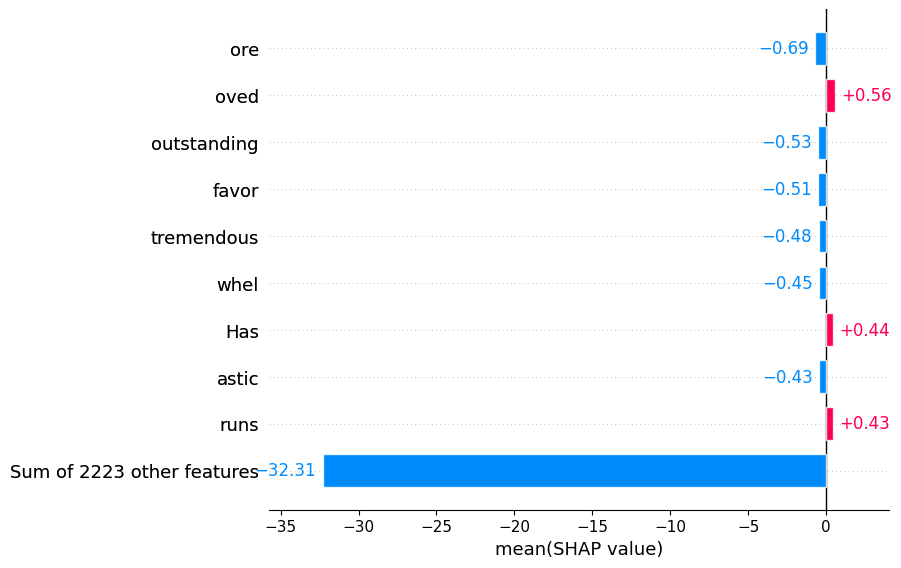

In [ ]:
shap.plots.bar(shap_values[:,:,"POSITIVE"].mean(0))

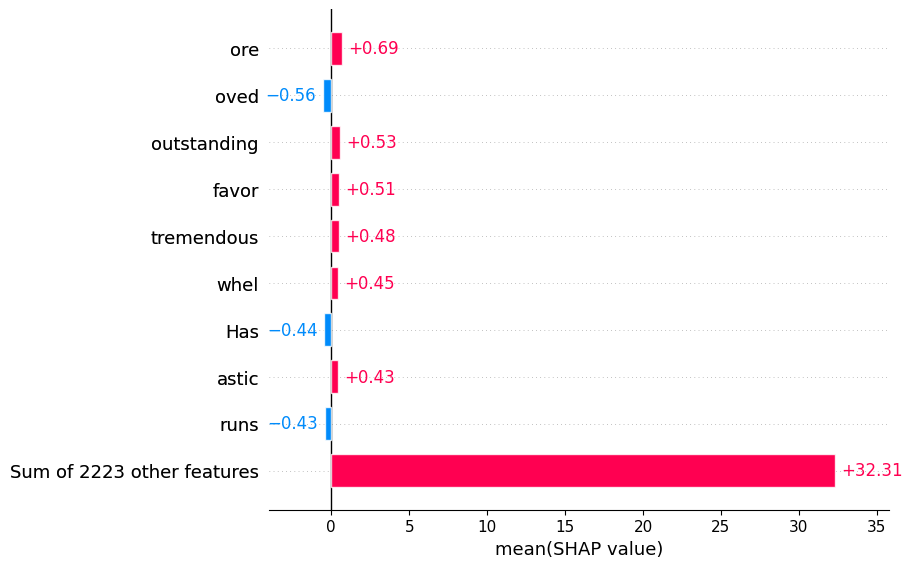

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0))

In [ ]:
data['verified_reviews'].iloc[0]

'Love my Echo!'

In [ ]:
for i in dataset['test']['verified_reviews'][:2000]:
  if len(i.split(" ")) >= 500:
    print(len(i.split(" ")))

In [ ]:
pmodel = shap.models.TransformersPipeline(pred, rescale_to_logits=False)


In [ ]:
pmodel = shap.models.TransformersPipeline(pred, rescale_to_logits=True)


In [ ]:
explainer2 = shap.Explainer(pmodel)
shap_values2 = explainer2(data['verified_reviews'].iloc[0:3])
shap.plots.text(shap_values2[:,:,1])

  0%|          | 0/498 [00:00<?, ?it/s]

In [ ]:
data.iloc[0:3]

verified_reviews  \
0                                      Love my Echo!   
1                                          Loved it!   
2  Sometimes while playing a game, you can answer...   

                                 paraphrased_reviews  
0                            I'm so fond of my Echo!  
1                                       I adored it!  
2  Sometimes when playing a game, I can answer a ...

In [ ]:
shap_values2 = explainer2(data['paraphrased_reviews'].iloc[0:3])
shap.plots.text(shap_values2[:,:,1])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


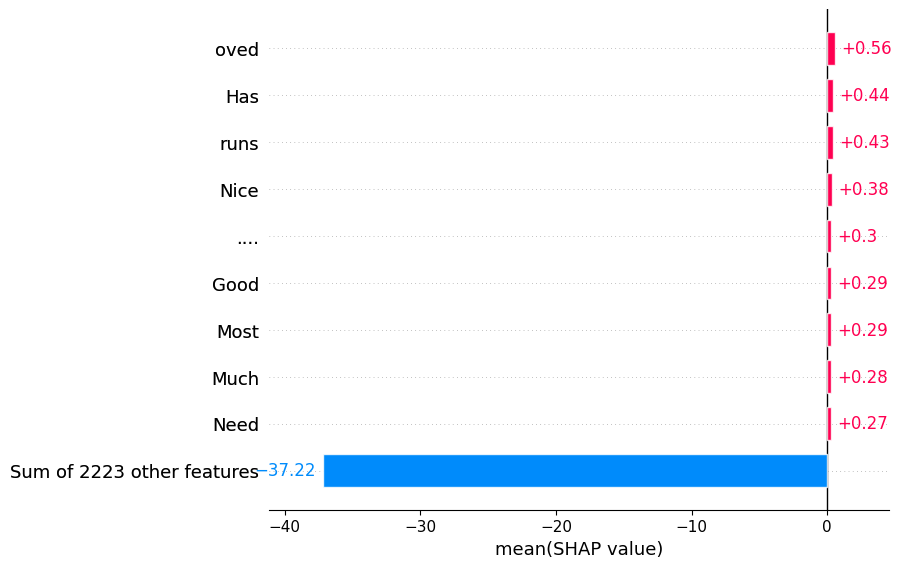

In [ ]:
shap.plots.bar(shap_values[:,:,"POSITIVE"].mean(0), order=shap.Explanation.argsort.flip)


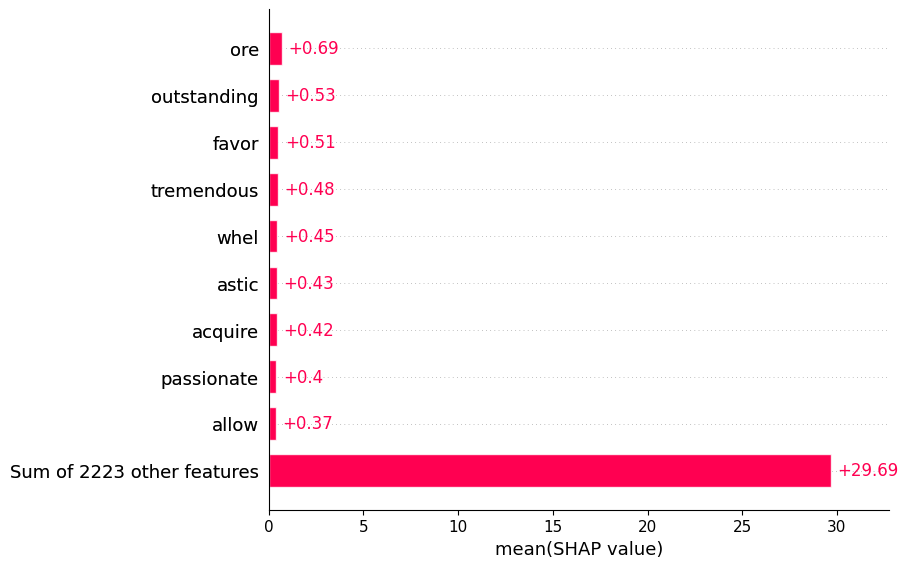

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), order=shap.Explanation.argsort.flip)


In [ ]:
data_query = pd.read_csv("answers.csv", on_bad_lines="skip")

In [ ]:
data_query

answers
0   Poor - I had a terrible experience at this hot...
1   Excellent - I had a great stay at this hotel i...
2   Terrible - This hotel in Rochester was one of ...
3   Fantastic - I had an amazing stay at this hote...
4   Awful - This hotel in Rochester was terrible. ...
5   This Nike tshirt is not worth the money. The m...
6   The Nike tshirt looks great and is very comfor...
7   The color of the Nike tshirt is not as vibrant...
8   The Nike tshirt is well-made and fits true to ...
9   The material of this Nike tshirt is not very b...
10        Captivating story in The Catcher in the Rye
11                    Poorly written dialogue in 1984
12       Engaging characters in To Kill a Mockingbird
13                Unclear plot in The Grapes of Wrath
14       Thought-provoking themes in The Great Gatsby
15  This restaurant was a huge disappointment. The...
16  The atmosphere was uninviting and the decor wa...
17                   The prices were very reasonable.
18  The wait staff was unhelpful and not very frie...
19  The portions were small and the quality of the...
20  Visiting the tourist place was a great experie...
21  The tourist place was overcrowded and it was d...
22  The staff were friendly and helpful and the fo...
23  The prices were expensive and there were a lot...
24  The activities were fun and the location was e...
25  This action movie is a must-see! The stunts ar...
26  This action movie is too much of the same. The...
27  This action movie is an adrenaline-filled ride...
28  This action movie is too violent for my taste....
29  This action movie is a must-see! The stunts ar...
30  This movie was a huge disappointment. The plot...
31  Despite the negative reviews, I found this mov...
32  This movie was a complete waste of time. The d...
33  I thought this movie had some great moments. T...
34  This movie was a complete disaster. The plot w...
35  This music festival was a great experience! Th...
36  This music festival was a huge disappointment....
37  The music festival was well organized and had ...
38  This music festival was way too crowded and it...
39  The music festival had a great variety of genr...

In [ ]:
shap_values2 = explainer2(data_query['answers'].iloc[0:3])
shap.plots.text(shap_values2[:,:,1])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 2/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 4it [00:17,  8.85s/it]
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


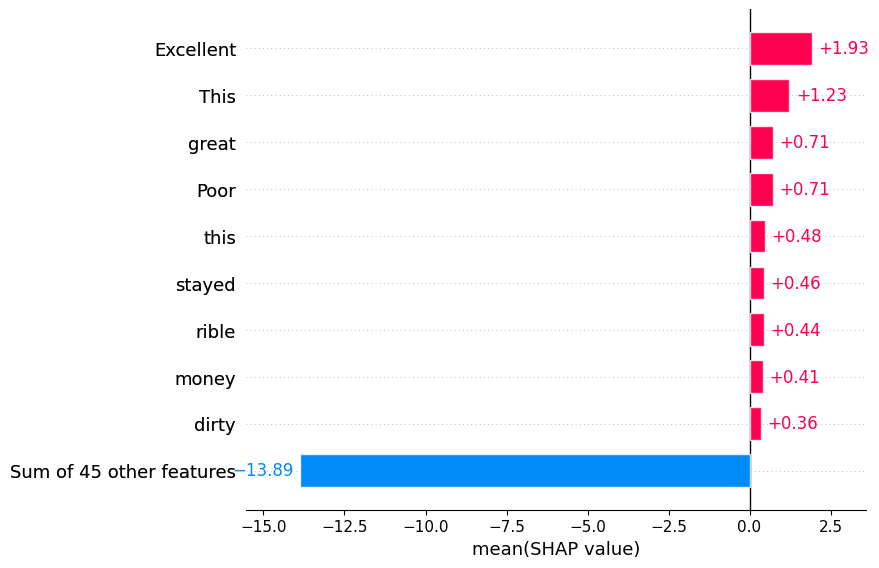

In [ ]:
shap.plots.bar(shap_values2[:,:,"POSITIVE"].mean(0), order=shap.Explanation.argsort.flip)

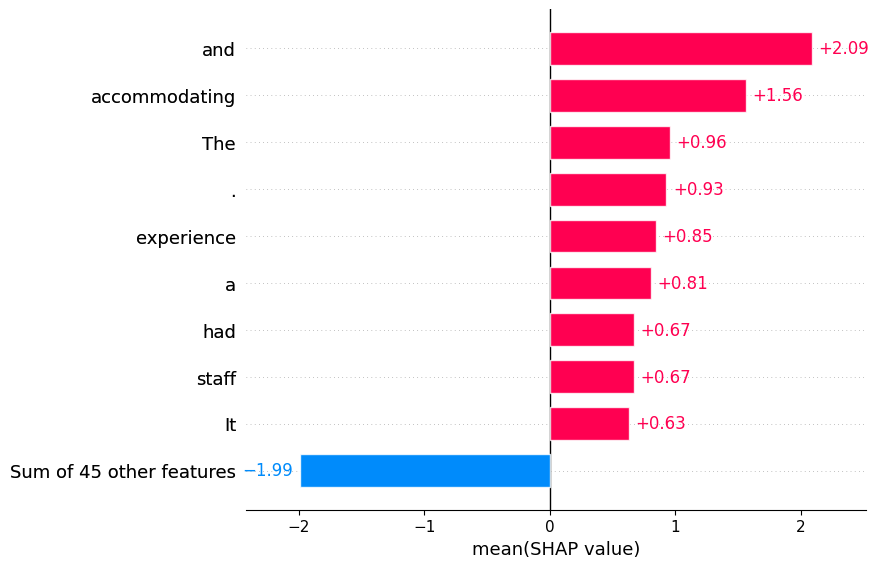

In [ ]:
shap.plots.bar(shap_values2[:,:,"NEGATIVE"].mean(0), order=shap.Explanation.argsort.flip)